# Predicting Breast Cancer in a patient using ensemble technique

# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Load the dataset

In [3]:
folder_path = (r'C:\Users\Abirami\Documents\GUVI\Project\BreastCancer\cancer.csv')

In [4]:
dataset = pd.read_csv(folder_path)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

# Drop the unwanted columns

Unnamed: 32 and id columns are not required so we are droping those columns from the dataframe

In [7]:
dataset.drop(columns=['Unnamed: 32','id'], inplace=True)

Again checking the info

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
dataset.shape

(569, 31)

Checking null values

In [10]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
dataset.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

# Data Preprocessing

here we are converting categorical coloumn to numeric

In [12]:
dataset['diagnosis'].replace(['B','M'], [0,1], inplace=True)

Diagnosis is the target variable.

1.Benign (B-0) -- No Cancer

2.Malignant (M-1) -- Cancer

# EDA

In [13]:
dataset['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Count of Benign & Malignant')

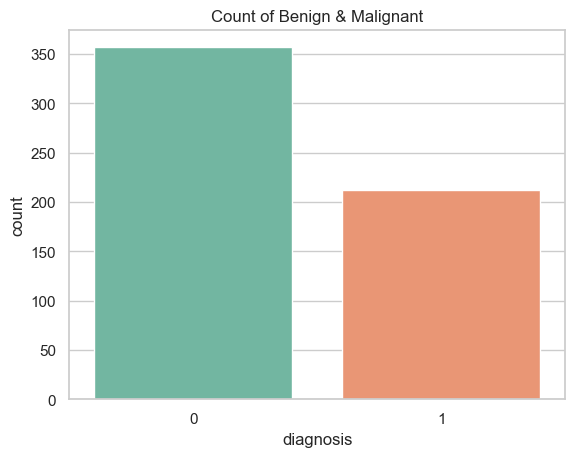

In [14]:
sb.set_theme(style="whitegrid")
sb.countplot(x = dataset['diagnosis'], palette="Set2")
plt.title('Count of Benign & Malignant')

univariate analaysis

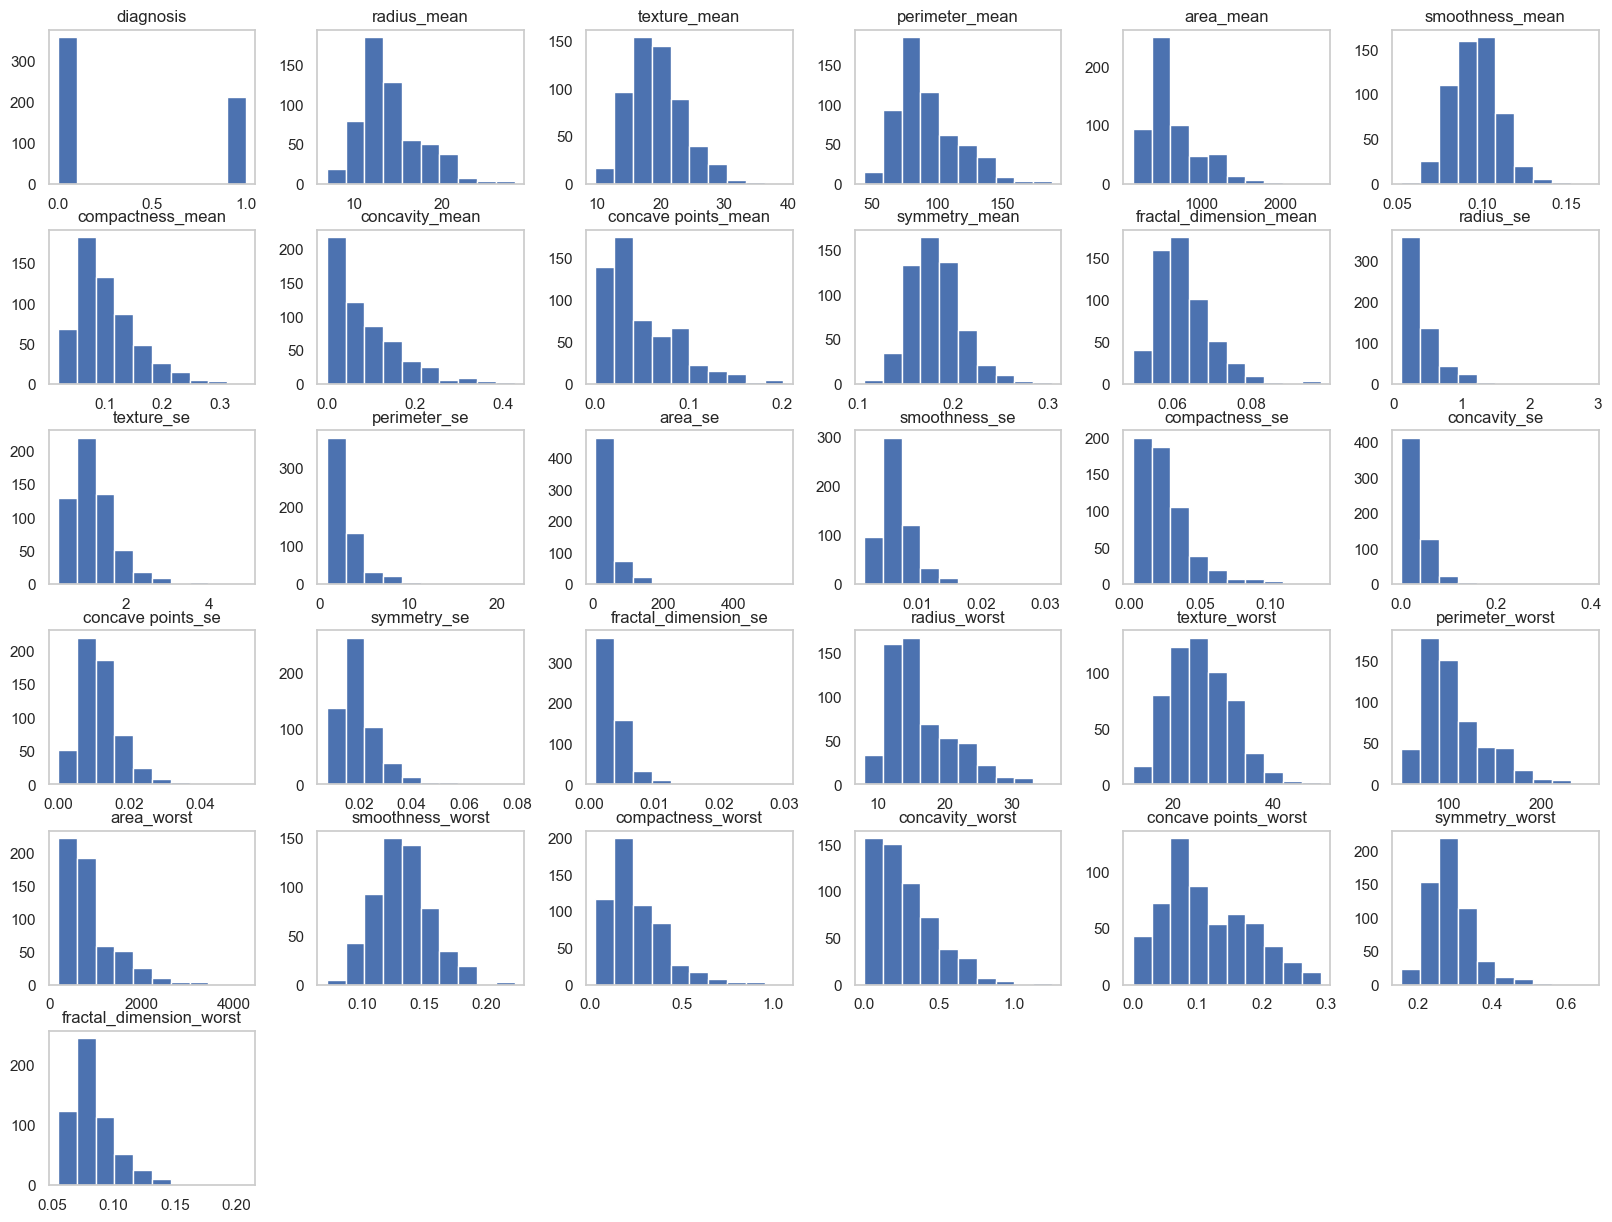

In [16]:
dataset.hist(bins=10, figsize=(20,15), grid=False)
plt.show()

from the above plot we can see outliers in concave_points_mean , fractional_dimension_mean, smoothness_worst

bivariate analysis 

In [18]:
mean = dataset.iloc[:,1:11]
se = dataset.iloc[:,11:21]
worst = dataset.iloc[:,21:31]

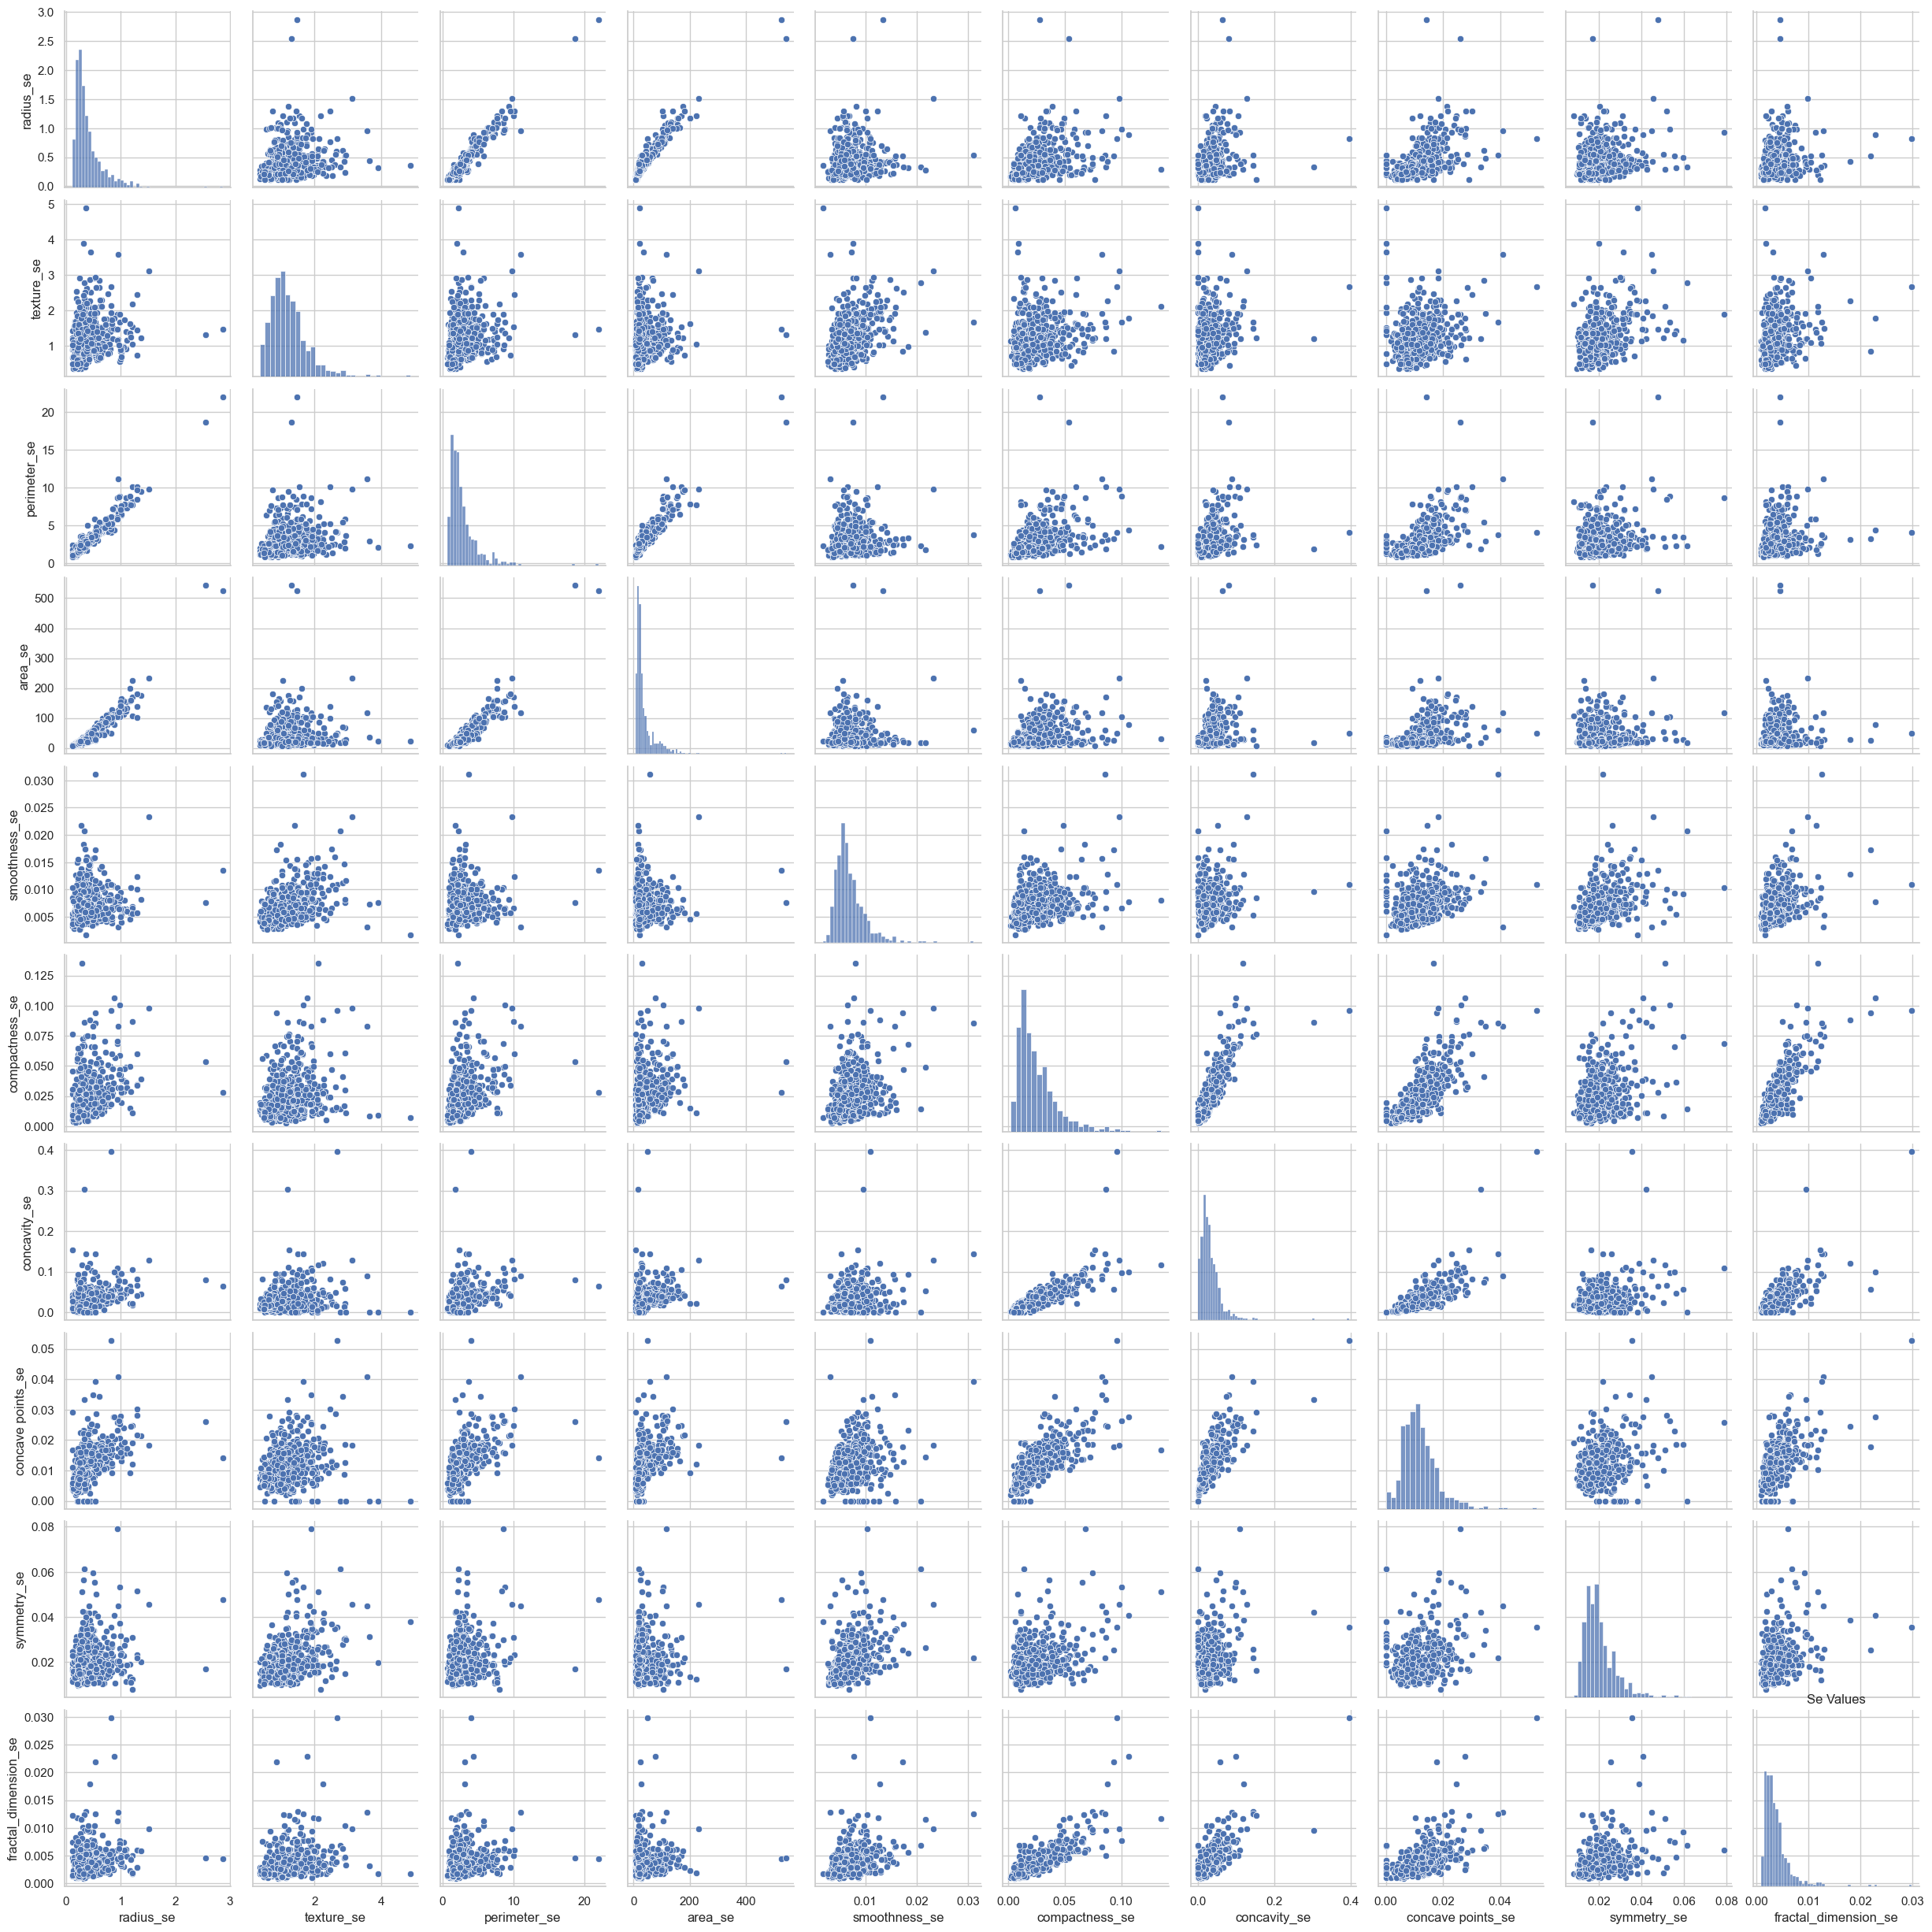

In [20]:
sb.pairplot(se)
plt.title("Se Values")
plt.show()

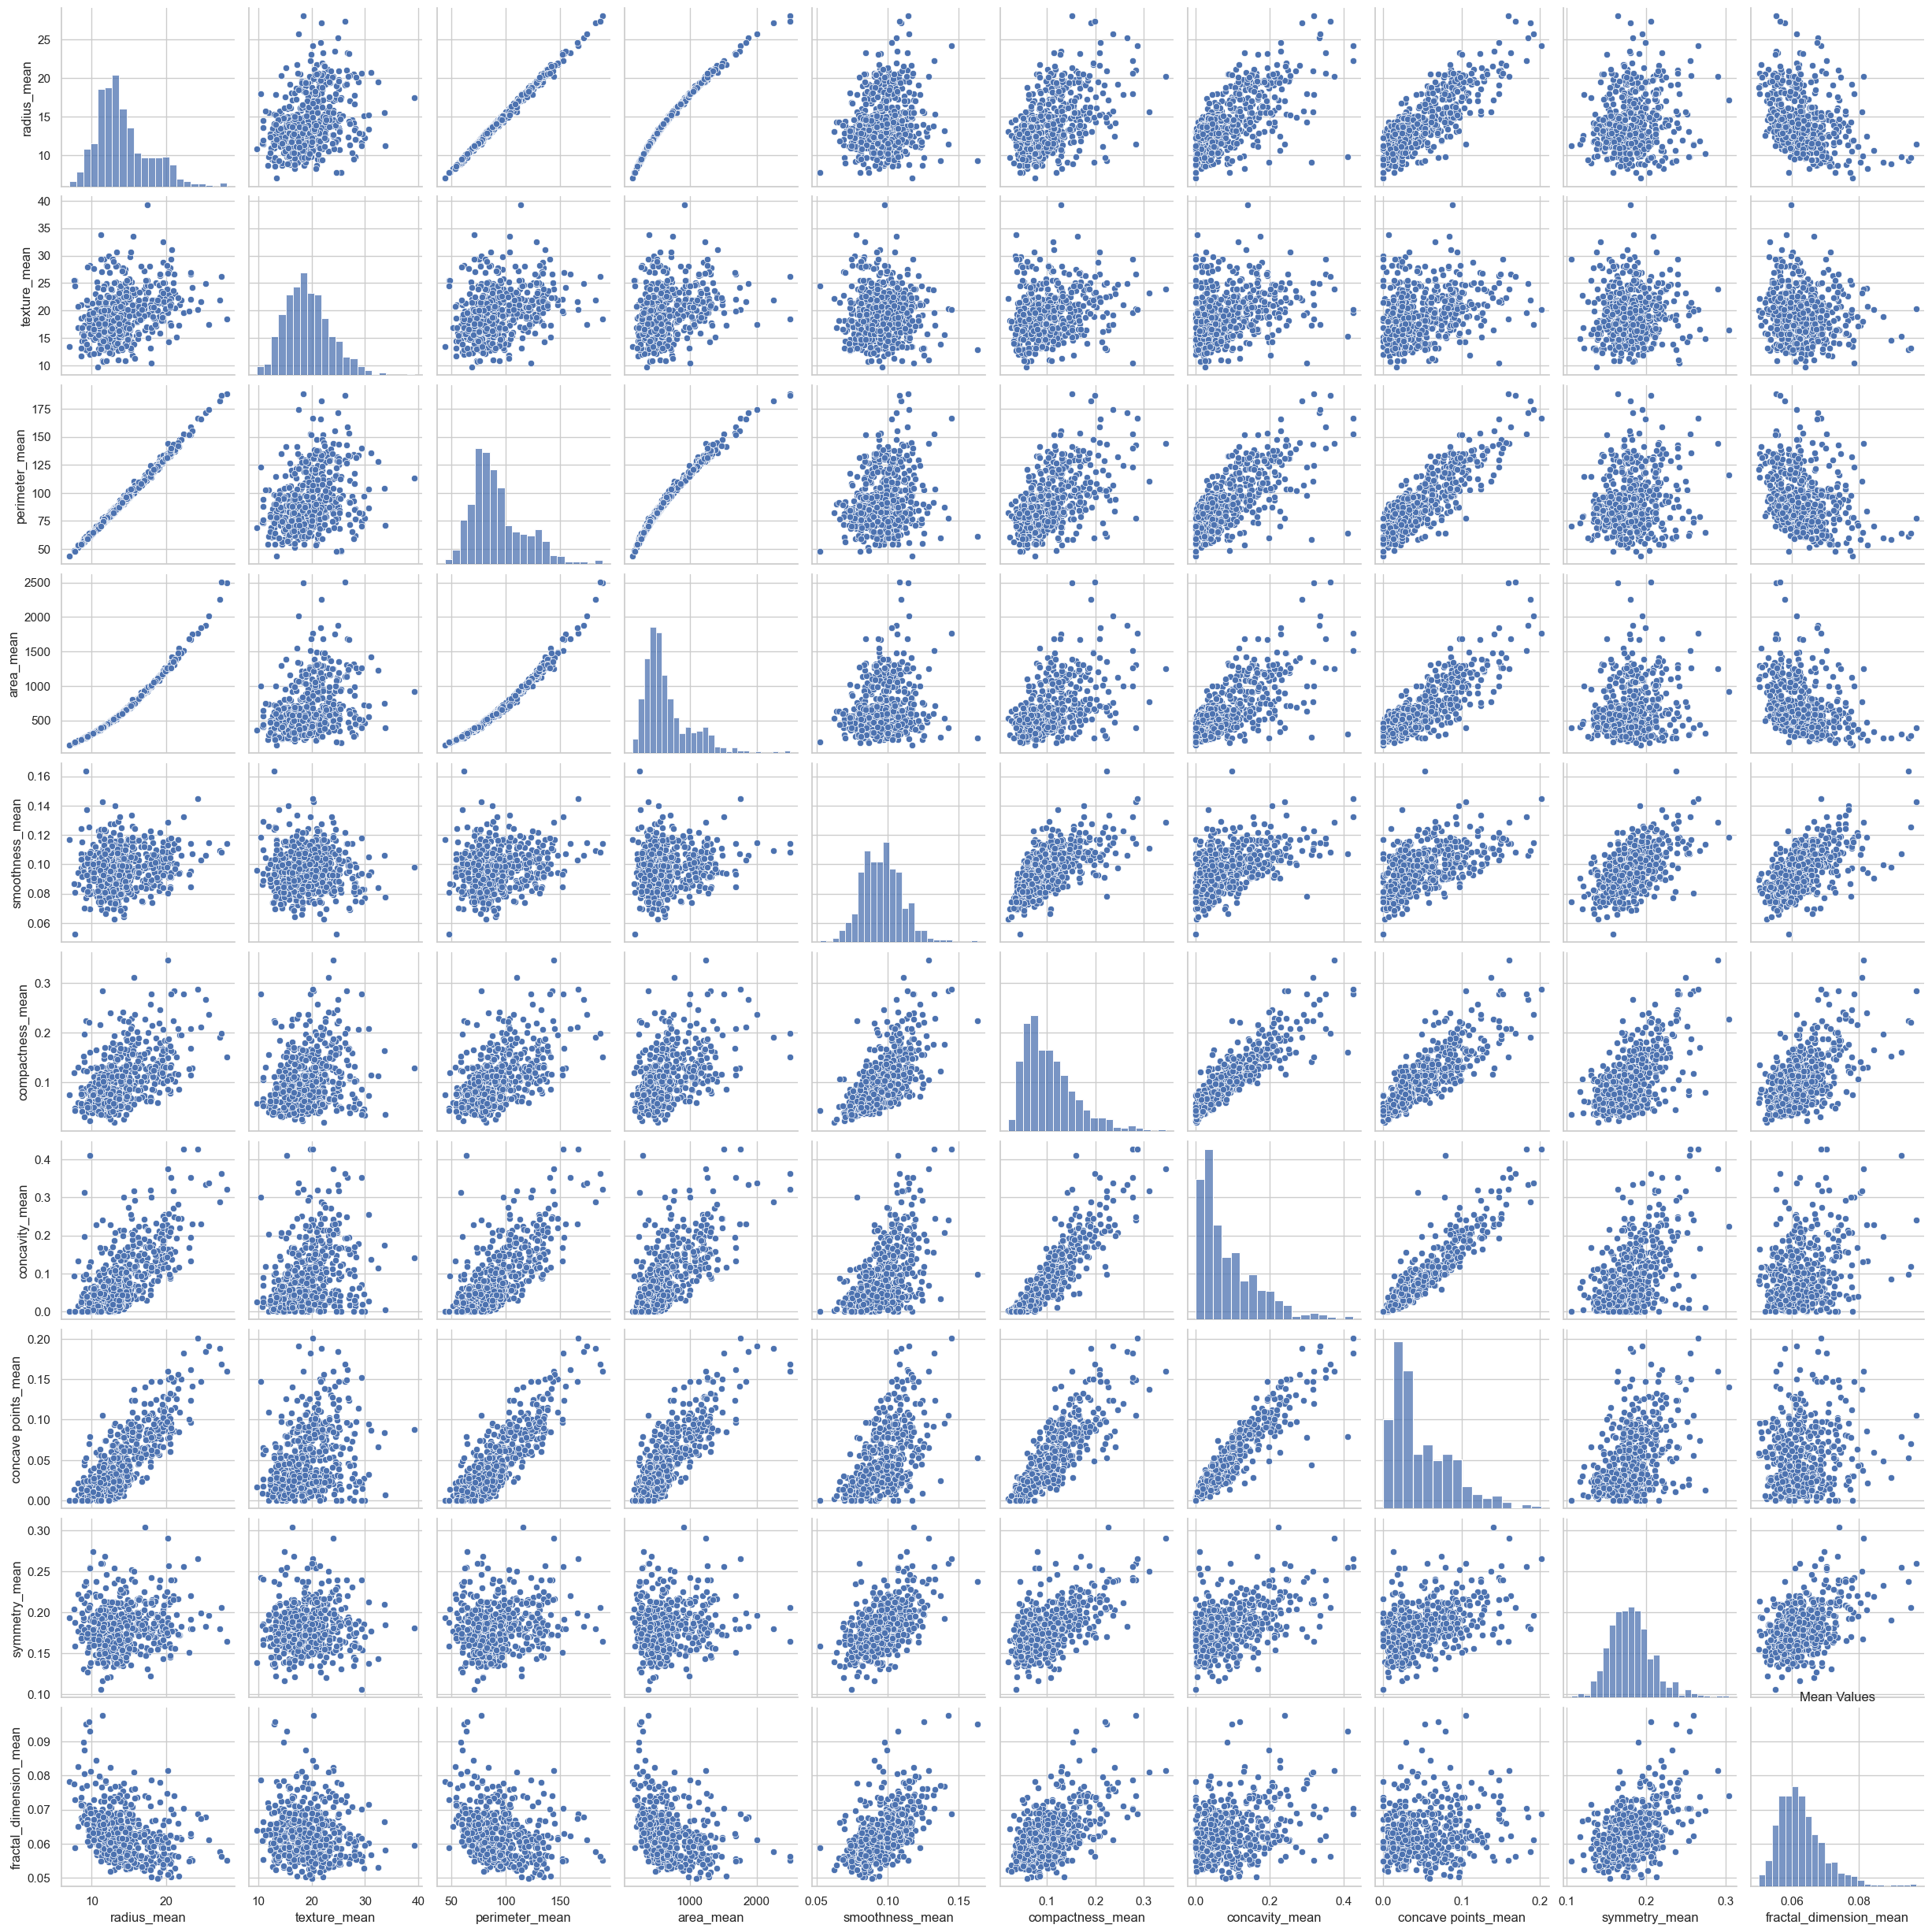

In [19]:
sb.pairplot(mean)
plt.title("Mean Values")
plt.show()

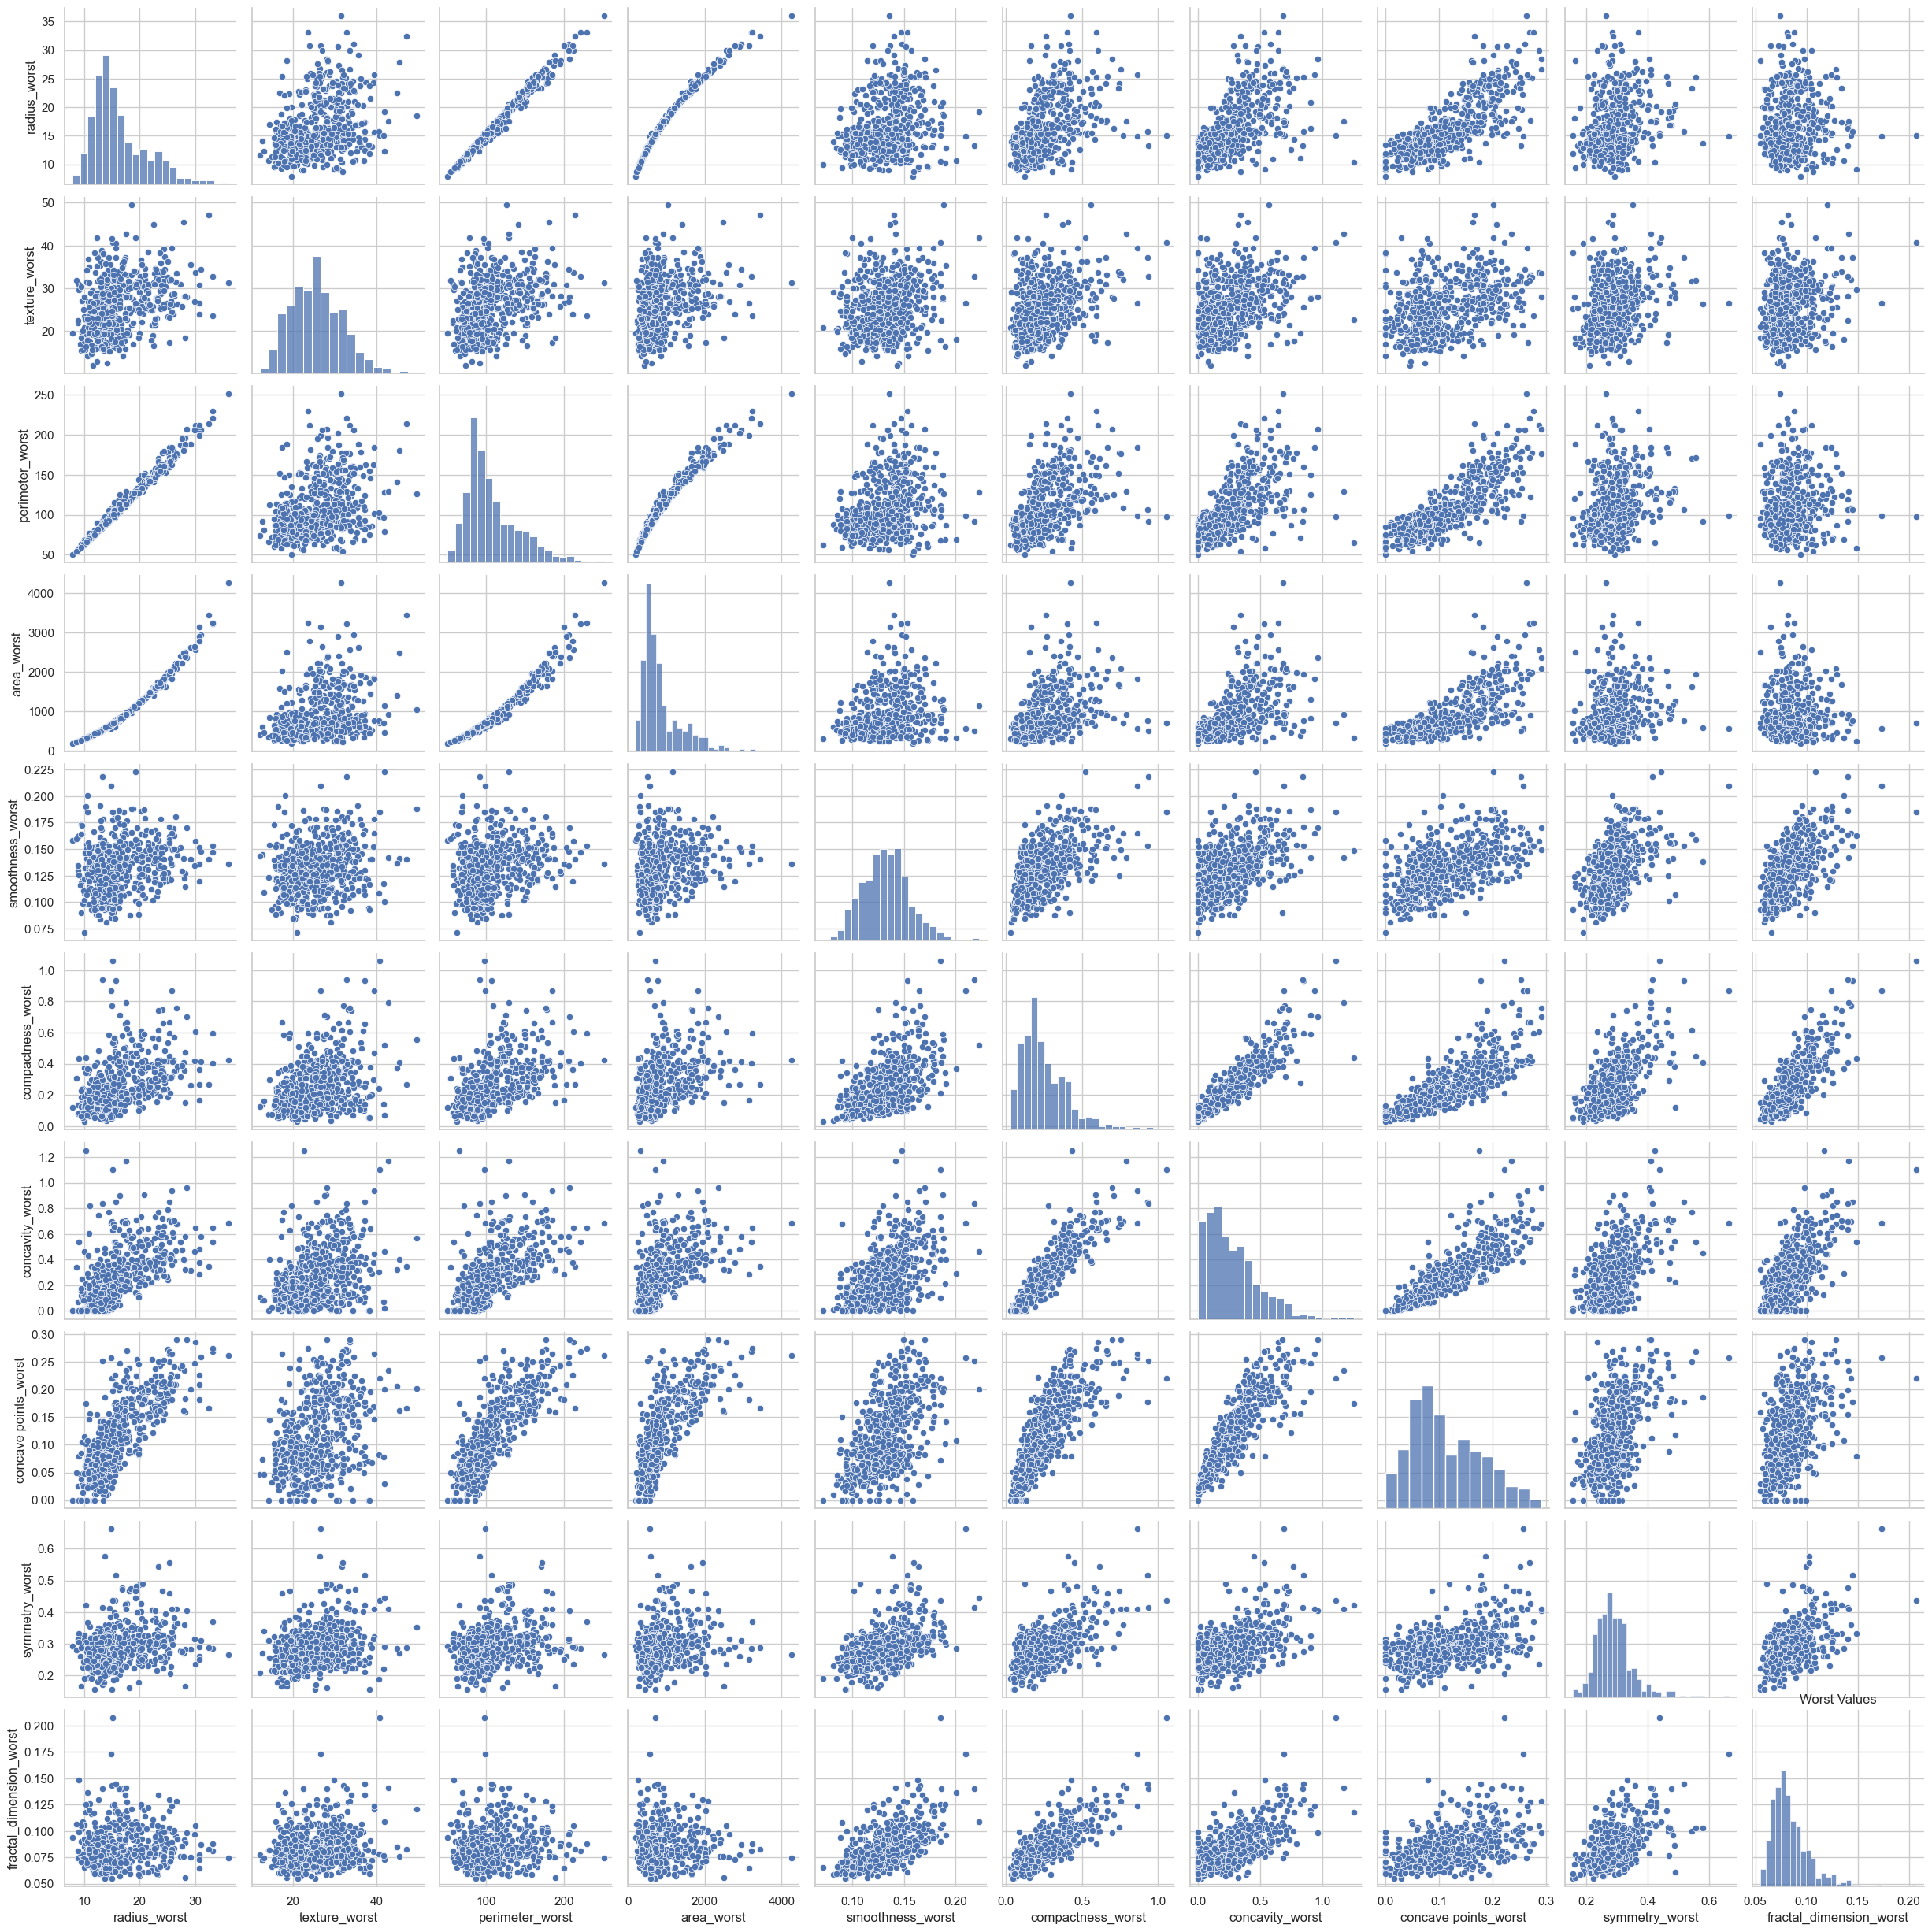

In [147]:
sb.pairplot(worst)
plt.title("Worst Values")
plt.show()

# Feature Selection

from the above pair plot we can observe that 
1. radius_mean and perimeter_mean,
radius_mean and area_mean,
perimeter_mean and area_mean.


2.radius_worst and perimeter_worst, radius_worst and area_worst, perimeter_worst and area_worst

are positively corelated. 


In [29]:
# checking correlation between mean & target variable to drop the columns
print(mean['radius_mean'].corr(dataset['diagnosis']))
print(mean['area_mean'].corr(dataset['diagnosis']))
print(mean['perimeter_mean'].corr(dataset['diagnosis']))

0.7300285113754555
0.7089838365853895
0.742635529725832


In [31]:
# checking correlation between worst & target variable to drop the columns
print(worst['radius_worst'].corr(dataset['diagnosis']))
print(worst['perimeter_worst'].corr(dataset['diagnosis']))
print(worst['area_worst'].corr(dataset['diagnosis']))

0.7764537785950386
0.7829141371737586
0.733825034921051


from the above result perimeter_mean and perimeter_worst is highly correlated with the target variable so we are dropping the other columns

In [30]:
dataset.drop(columns=['radius_mean','area_mean','radius_worst','area_worst'], inplace=True)

# spliting train and test data

In [33]:
x = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state= 42)

## SVM

In [35]:
model = svm.SVC()

In [36]:
model.fit(x_train,y_train)

SVC()

In [47]:
svm_prdeict = model.predict(x_test)

In [48]:
svm_accuracy = accuracy_score(y_test,svm_prdeict)
svm_precision = precision_score(y_test,svm_prdeict)
svm_recall = recall_score(y_test,svm_prdeict)
svm_f1 = f1_score(y_test,svm_prdeict)

In [60]:
print('accuracy: {:.2f}'.format(svm_accuracy))
print('precision: {:.2f}'.format(svm_precision))
print('recall: {:2f}'.format(svm_recall))
print('f1_score: {:2f}'.format(svm_f1))

accuracy: 0.94
precision: 0.98
recall: 0.857143
f1_score: 0.915254


# KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(x_train,y_train)

In [51]:
knn_predict = knn.predict(x_test)

In [52]:
knn_accuracy = accuracy_score(y_test,knn_predict)
knn_precision = precision_score(y_test,knn_predict)
knn_recall = recall_score(y_test,knn_predict)
knn_f1 = f1_score(y_test,knn_predict)

In [53]:
# eval
print('accuracy: {:.2f}'.format(knn_accuracy))
print('precision: {:.2f}'.format(knn_precision))
print('recall: {:2f}'.format(knn_recall))
print('f1_score: {:2f}'.format(knn_f1))

accuracy: 0.96
precision: 0.94
recall: 0.952381
f1_score: 0.944882


# Random Forest

In [43]:
rf = RandomForestClassifier(n_estimators=100,criterion='gini')
rf.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
rf_predict = rf.predict(x_test)

In [54]:
rf_accuracy = accuracy_score(y_test,rf_predict)
rf_precision = precision_score(y_test,rf_predict)
rf_recall = recall_score(y_test,rf_predict)
rf_f1 = f1_score(y_test,rf_predict)

In [55]:
print('accuracy: {:.2f}'.format(rf_accuracy))
print('precision: {:.2f}'.format(rf_precision))
print('recall: {:2f}'.format(rf_recall))
print('f1_score: {:2f}'.format(rf_f1))

accuracy: 0.96
precision: 0.97
recall: 0.936508
f1_score: 0.951613


# combining predictions

In [71]:
accuracy_list = [svm_accuracy, knn_accuracy, rf_accuracy]
precision_list = [svm_precision, knn_precision, rf_precision]
recall_list = [svm_recall, knn_recall, rf_recall]
f1_list = [svm_f1, knn_f1, rf_f1]

columns = ['SVM','KNN','Random Forest']
index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
evaluation_df = pd.DataFrame([accuracy_list, precision_list, recall_list, f1_list], columns=columns, index=index)
evaluation_df = evaluation_df.transpose()

In [72]:
evaluation_df

Accuracy  Precision    Recall  F1 Score
SVM            0.941520   0.981818  0.857143  0.915254
KNN            0.959064   0.937500  0.952381  0.944882
Random Forest  0.964912   0.967213  0.936508  0.951613

# Highest Accurate Model

In [74]:
evaluation_df.sort_values(by = "Accuracy", ascending = False)

Accuracy  Precision    Recall  F1 Score
Random Forest  0.964912   0.967213  0.936508  0.951613
KNN            0.959064   0.937500  0.952381  0.944882
SVM            0.941520   0.981818  0.857143  0.915254

# Highest Precision score model

In [75]:
evaluation_df.sort_values(by = "Precision", ascending = False)

Accuracy  Precision    Recall  F1 Score
SVM            0.941520   0.981818  0.857143  0.915254
Random Forest  0.964912   0.967213  0.936508  0.951613
KNN            0.959064   0.937500  0.952381  0.944882

# Highest Recall Score Model

In [76]:
evaluation_df.sort_values(by = "Recall", ascending = False)

Accuracy  Precision    Recall  F1 Score
KNN            0.959064   0.937500  0.952381  0.944882
Random Forest  0.964912   0.967213  0.936508  0.951613
SVM            0.941520   0.981818  0.857143  0.915254

# Highest f1_score model

In [77]:
evaluation_df.sort_values(by = "F1 Score", ascending = False)

Accuracy  Precision    Recall  F1 Score
Random Forest  0.964912   0.967213  0.936508  0.951613
KNN            0.959064   0.937500  0.952381  0.944882
SVM            0.941520   0.981818  0.857143  0.915254